In [268]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from functools import reduce
import math
import urllib
import difflib
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import KNNImputer

Loading the data of the founding rounds sheet for exploration

In [230]:
df_rounds_fail = pd.read_csv('data/failure/Moneyball 1.1_ Fail - Funding rounds.csv')
df_rounds_success = pd.read_csv('data/success/Moneyball 1.1_ Success - Funding rounds.csv')

Lets explore the new founding rounds sheat

In [231]:
# df_list_SuccessComp[3].head()
df_rounds_success['org_uuid'].nunique(), df_rounds_fail['org_uuid'].nunique()
# df_list_UnsuccessComp[3].nunique()

(2425, 5431)

In [232]:
df_rounds_success['org_uuid'].value_counts()

df30d610-5326-41d5-c448-a4cfb36747a3    7
b01a9c91-e915-4737-86b6-e34adf12283d    7
8e90d05f-a415-dad9-1b01-621527979843    7
08fb213a-b9df-8412-840b-a2db3e49ec0f    7
9f2f1bf0-4139-7ae1-72cb-123d5ad08370    6
                                       ..
8f3e6d2d-c8cb-fca5-e2e4-ca567940c6da    1
eddf0c0e-dcae-f617-c8ea-b135087673ad    1
6859c706-dabe-f168-a3f6-4c45417d9be9    1
557d6676-fc1a-33f0-656b-9871f4a66438    1
70f3a143-e173-4971-b13f-9ebf708e9a2f    1
Name: org_uuid, Length: 2425, dtype: int64

A few companies have several entries for funding rounds, lets plot this

Text(0.5, 1.0, 'Frequency of unique company Ids in funding rounds spreadsheet for success')

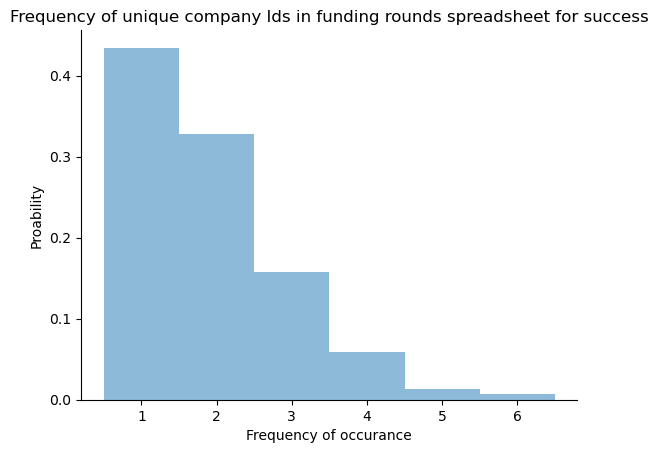

In [233]:
fig, ax = plt.subplots()
ax.hist(df_rounds_success['org_uuid'].value_counts(), bins=np.arange(7) + 0.5, density=True, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Frequency of occurance")
ax.set_ylabel("Proability")
ax.set_title('Frequency of unique company Ids in funding rounds spreadsheet for success')

Text(0.5, 1.0, 'Frequency of unique company Ids in funding rounds spreadsheet for unsuccessful')

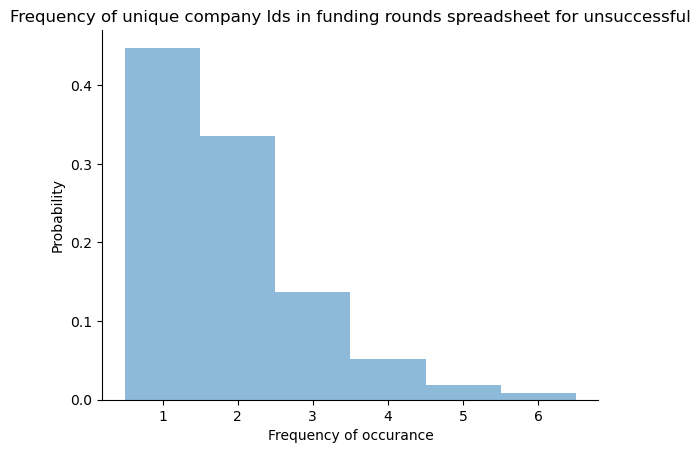

In [234]:
fig, ax = plt.subplots()
ax.hist(df_rounds_fail['org_uuid'].value_counts(), bins=np.arange(7) + 0.5,density=True, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Frequency of occurance")
ax.set_ylabel("Probability")
ax.set_title('Frequency of unique company Ids in funding rounds spreadsheet for unsuccessful')

These distributions look similar so pure number of funding rounds may not be super indicative of success. Lets plot frequencies of, pre_seed, seed, series_a, angel per company.

Text(0.5, 1.0, 'Pre seed funding rounds per company (success)')

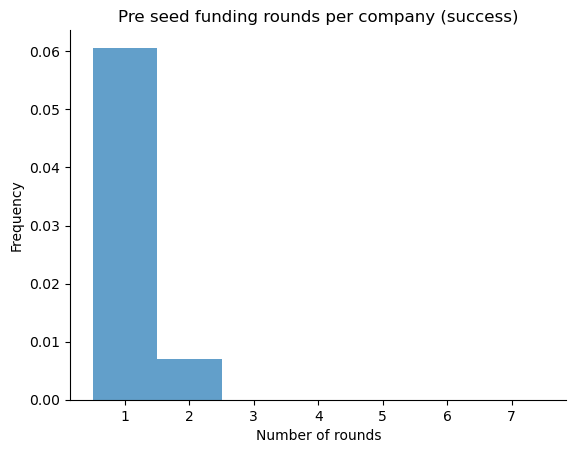

In [235]:
count_df_success = df_rounds_success.groupby(['org_uuid', 'investment_type'], as_index=False).size()
count_df_fail    = df_rounds_fail.groupby(['org_uuid', 'investment_type'], as_index=False).size()

frequencies = count_df_success.loc[count_df_success['investment_type'] == 'pre_seed', 'size'].value_counts()

frequencies = np.pad(frequencies.to_numpy(), (0,7-frequencies.shape[0]), mode='constant', constant_values=0)

frequencies = frequencies/df_rounds_success['org_uuid'].nunique()
# lets plot this for successful companies
fig, ax = plt.subplots()
ax.bar(np.arange(1,8), frequencies, alpha=0.7, width=1.0)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Pre seed funding rounds per company (success)')


Text(0.5, 1.0, 'Pre seed funding rounds per company (Fail)')

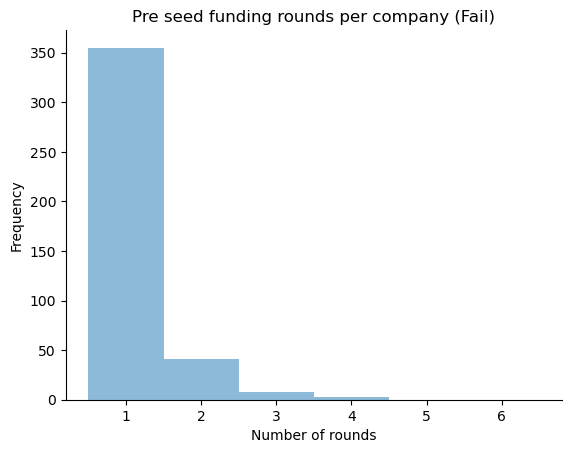

In [236]:
# lets plot this for successful companies
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'pre_seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Pre seed funding rounds per company (Fail)')

Text(0.5, 1.0, 'Seed funding rounds per company (Success)')

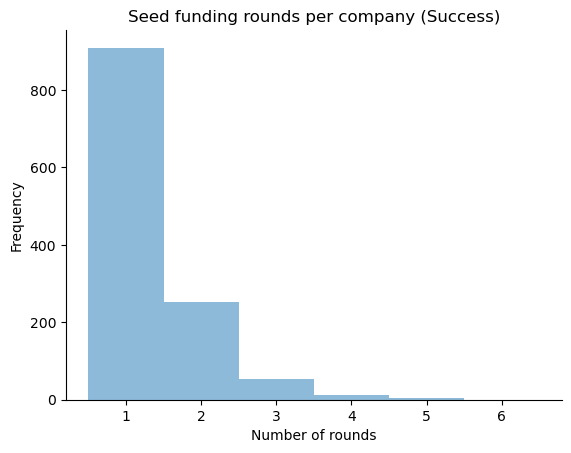

In [237]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Seed funding rounds per company (Success)')

Text(0.5, 1.0, 'Seed funding rounds per company (Fail)')

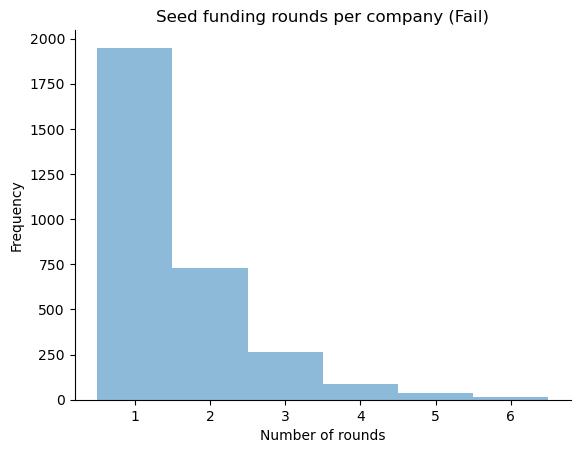

In [238]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Seed funding rounds per company (Fail)')

Text(0.5, 1.0, 'Series A funding rounds per company (Success)')

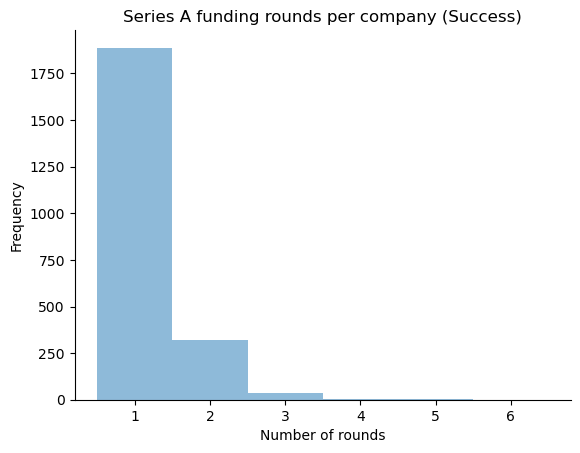

In [239]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'series_a', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Series A funding rounds per company (Success)')

Text(0.5, 1.0, 'Series A funding rounds per company (Success)')

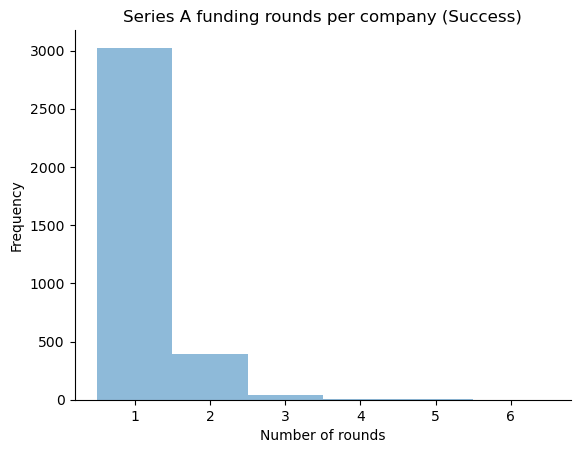

In [240]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'series_a', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Series A funding rounds per company (Success)')

Text(0.5, 1.0, 'Angel funding rounds per company (Success)')

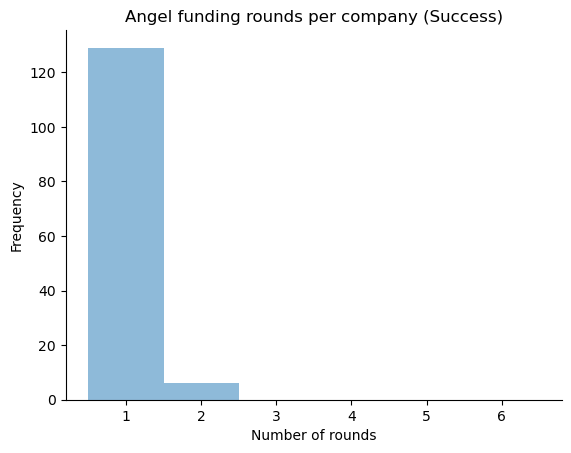

In [241]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'angel', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Angel funding rounds per company (Success)')

Text(0.5, 1.0, 'Angel funding rounds per company (Fail)')

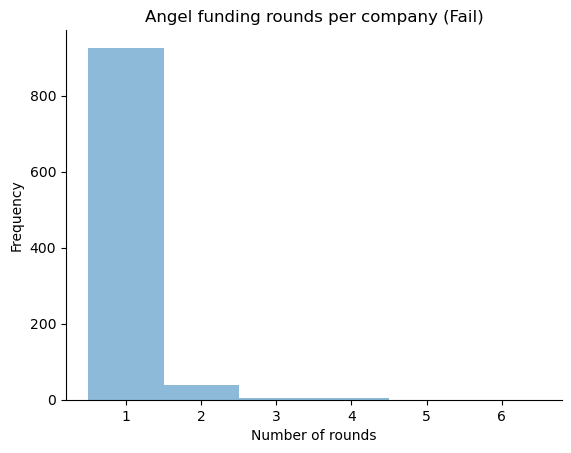

In [242]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'angel', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Angel funding rounds per company (Fail)')

Lets make a big plot for all of this for all founding rounds and for fail and success

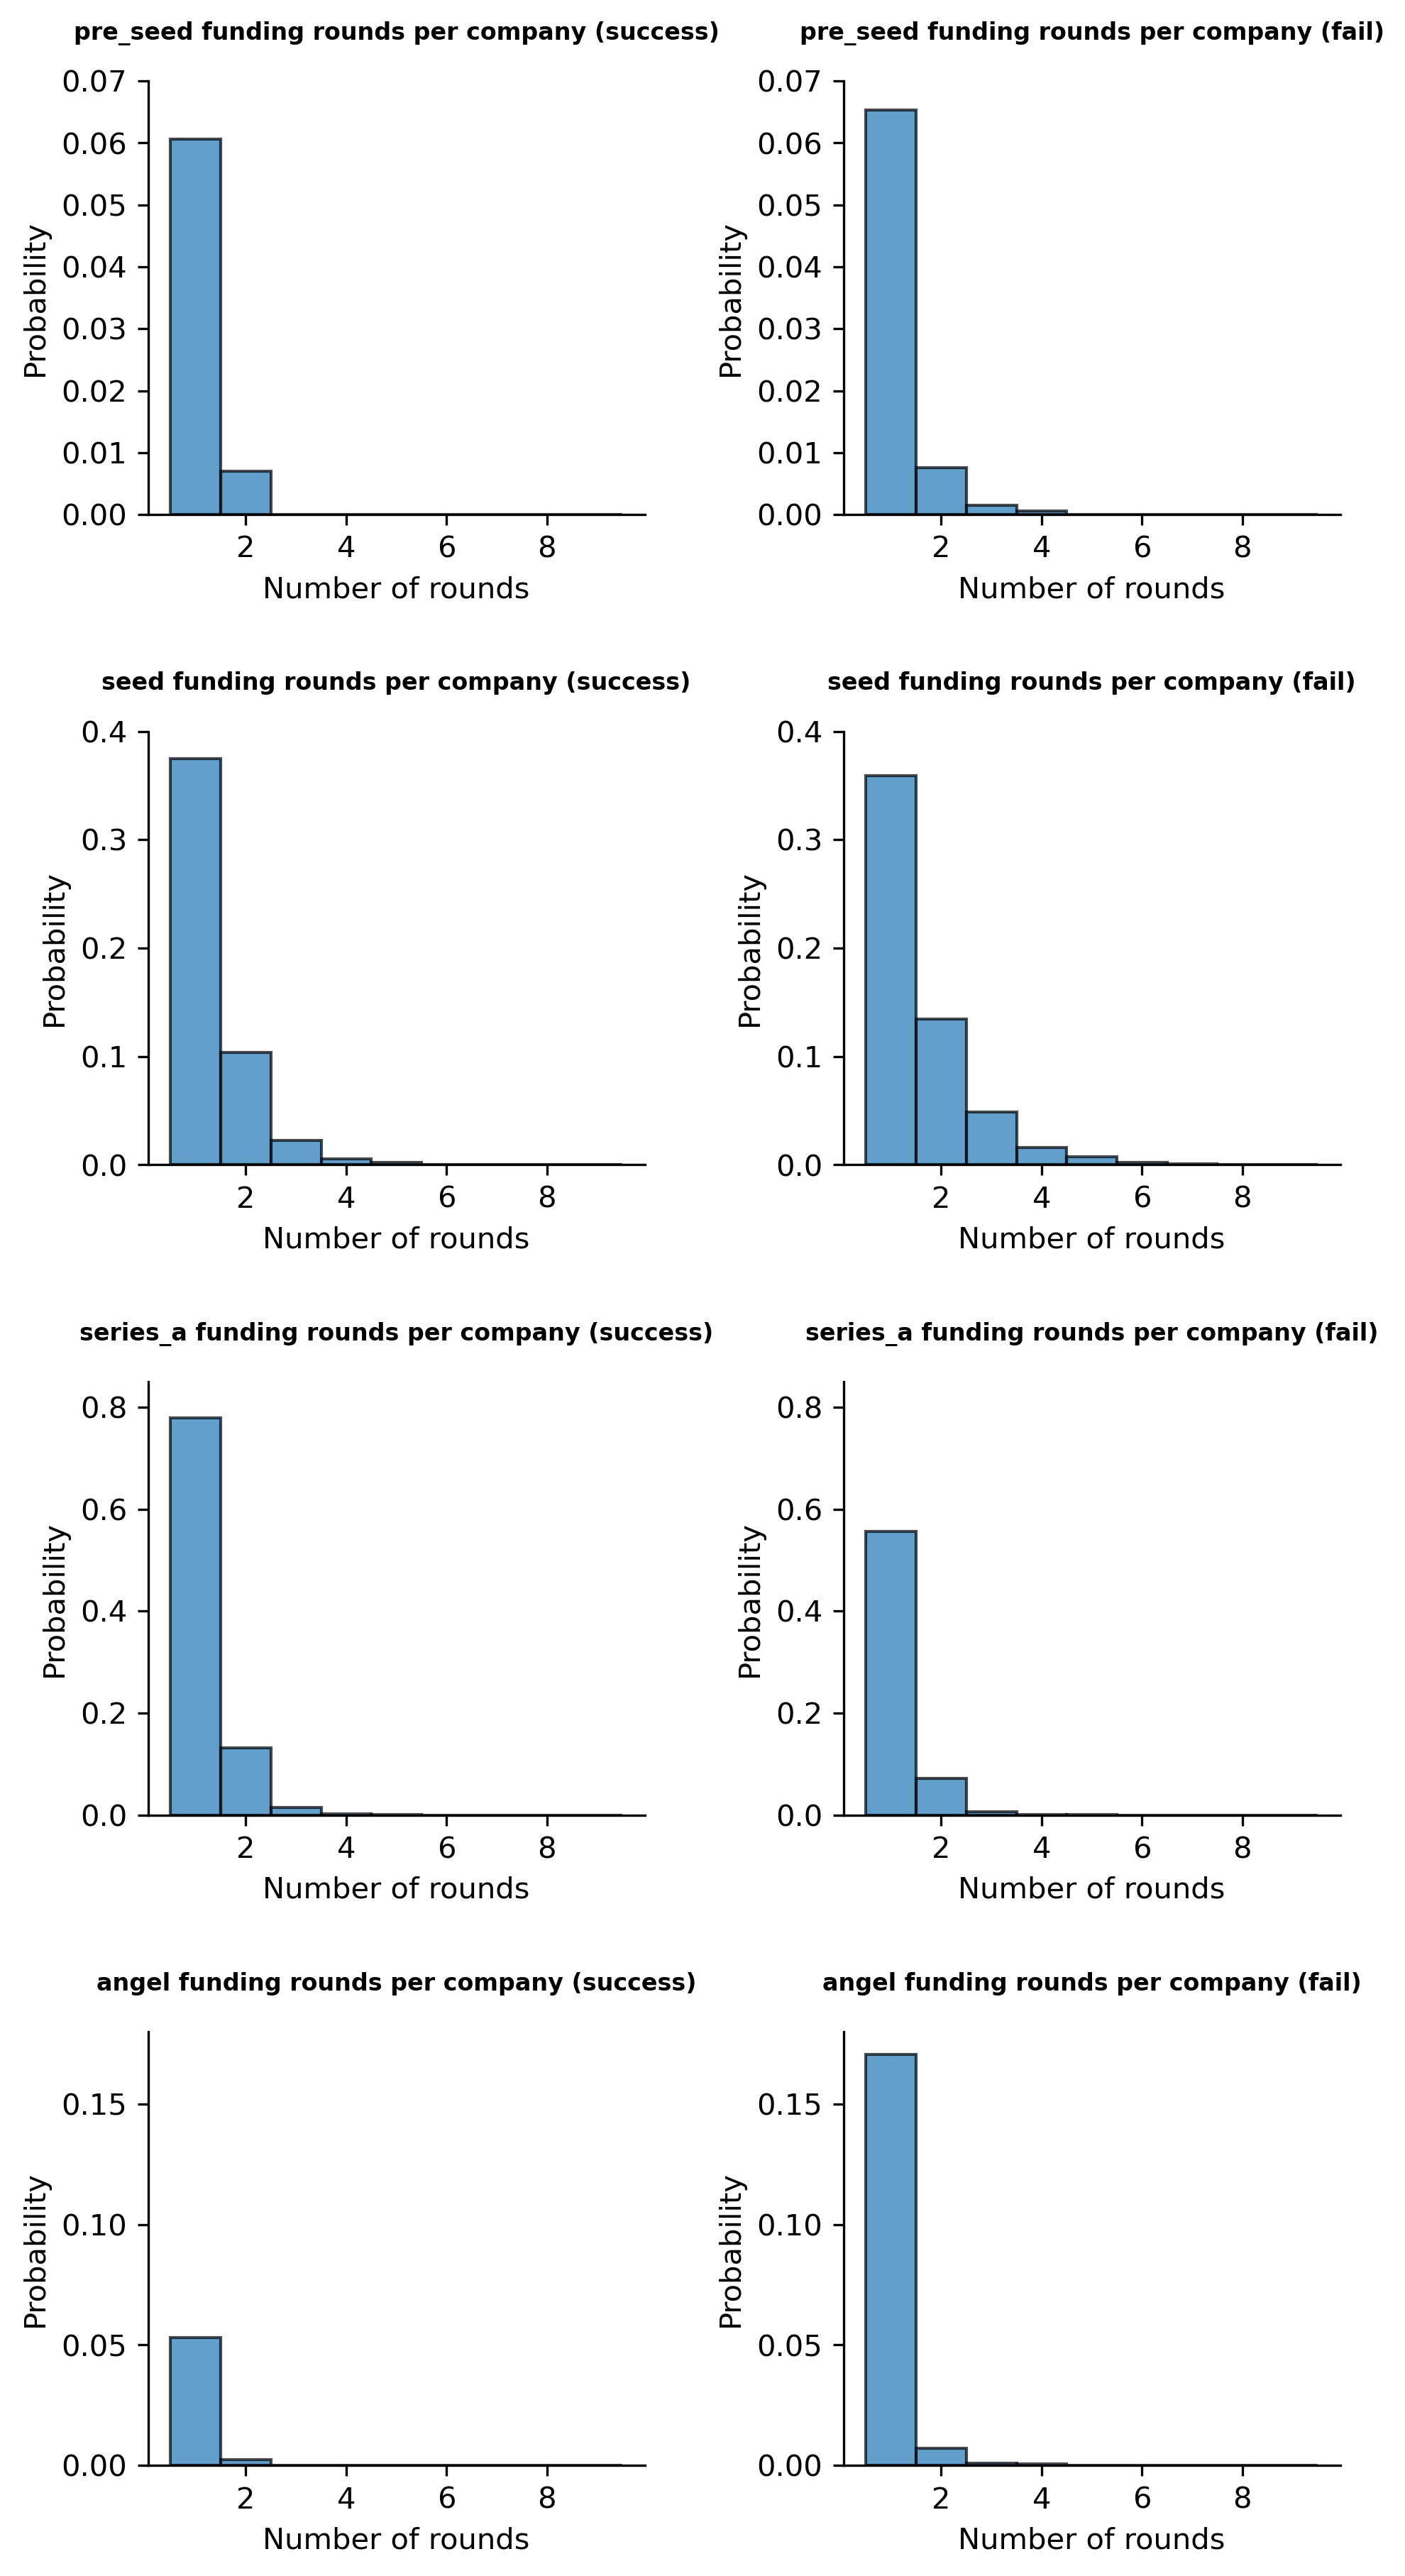

In [243]:
# Define figure
fig, axes = plt.subplots(4, 2, figsize=(8, 14), dpi=300, facecolor='w')
inve_type_list = ['pre_seed', 'seed', 'series_a', 'angel']
limit_list     = [[0, 0.07],[0, 0.4],[0, 0.85],[0, 0.18]]

for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        # get the right data
        frequencies = count_df_success.loc[count_df_success['investment_type'] == inve_type_list[int(i/2)], 'size'].value_counts()
        frequencies = np.pad(frequencies.to_numpy(), (0,9-frequencies.shape[0]), mode='constant', constant_values=0)
        frequencies = frequencies/df_rounds_success['org_uuid'].nunique()

        ax.bar(np.arange(1,10), frequencies, alpha=0.7, edgecolor='k', width=1.0)

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Number of rounds")
        ax.set_ylabel("Probability")
        ax.set_title(inve_type_list[int((i)/2)] + ' funding rounds per company (success)', fontweight='bold', fontsize=8, pad=14)
        ax.set_ylim(limit_list[int(i/2)])

    else:
        # get the right data
        frequencies = count_df_fail.loc[count_df_fail['investment_type'] == inve_type_list[int((i-1)/2)], 'size'].value_counts()
        frequencies = np.pad(frequencies.to_numpy(), (0,9-frequencies.shape[0]), mode='constant', constant_values=0)
        frequencies = frequencies/df_rounds_fail['org_uuid'].nunique()

        ax.bar(np.arange(1,10), frequencies, alpha=0.7, edgecolor='k', width=1.0)

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Number of rounds")
        ax.set_ylabel("Probability")
        ax.set_title(inve_type_list[int((i-1)/2)] + ' funding rounds per company (fail)', fontweight='bold', fontsize=8, pad=14)
        ax.set_ylim(limit_list[int((i-1)/2)])

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

This is very interesting, the number of founding rounds at each stage might become a feature for our model. We are not sure yet how indicative they are of company success. Now we will try to do some more feature engineering. We will look at founding date to first funding round as a primary step. For this we have to load the company dataframe.

In [244]:
df_company_success = pd.read_csv('data/success/Moneyball 1.1_ Success - Company.csv')
df_company_fail    = pd.read_csv('data/failure/Moneyball 1.1_ Fail - Company.csv')
df_company_success.head()


,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...
2,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea..."
3,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...
4,8e5b2628-6d2b-4f0a-9808-07c935156515,1inch,1inch.io,operating,7/9/20,"Blockchain,Cryptocurrency,Information Services...","Financial Services,Information Technology,Othe...",KNA,Old Road Town,1inch Limited builds decentralized protocols a...


These are in string format so we should change this

In [245]:
# lets first drop hours, minutes, seconds, and milliseconds. Unlikely we need this precision
df_rounds_success['round_created_at'] = df_rounds_success['round_created_at'].str.split(' ').str[0]
df_rounds_fail['round_created_at'] = df_rounds_fail['round_created_at'].str.split(' ').str[0]
# and we change dashes for slashes
df_rounds_success['round_created_at'] = df_rounds_success['round_created_at'].map(lambda x: x.replace('-', '/'))
df_rounds_fail['round_created_at'] = df_rounds_fail['round_created_at'].map(lambda x: x.replace('-', '/'))

# now we convert to the desired date format
df_rounds_success['round_created_at'] = pd.to_datetime(df_rounds_success['round_created_at'],
                                                        format= "%Y/%m/%d"
                                                        )
df_rounds_fail['round_created_at'] = pd.to_datetime(df_rounds_fail['round_created_at'],
                                                        format= "%Y/%m/%d"
                                                        )                                                        
df_rounds_success.head()

,org_uuid,org_name,investment_type,round_created_at,raised_amount_usd,investor_count,investors_names,investors_uuids
0,b42a3bec-1f35-42a3-9d5a-e6d3199440c6,Yuga Labs,seed,2022-03-22,450000000.0,39.0,"Adidas,Animoca Brands,Artist Capital Managemen...","eec354de-1ed2-254d-647b-f218643791d9,8f1b5d66-..."
1,8335acfe-629e-4073-b857-205b3b5d2a3d,Bakkt,series_a,2019-01-02,182500000.0,15.0,"Alan Howard,CMT Digital Ventures,Chainfund Cap...","df033e28-b918-55b6-4898-c9966dd579b2,07ffde2d-..."
2,1fc074a8-9f78-4dee-ba4e-d3a7de3096b4,Aptos,seed,2022-03-15,200000000.0,15.0,"Andreessen Horowitz,BlockTower Capital,Coinbas...","ce91bad7-b6d8-e56e-0f45-4763c6c5ca29,2b638738-..."
3,af0849e9-cddf-7558-1110-6b0900406945,Solugen,seed,2017-10-25,4400000.0,15.0,"Brad Flora,Cantos,Fifty Years,FundersClub,Hack...","759ccd3b-a622-8d14-5656-86662013a1e6,0c9a00aa-..."
4,cf6d3339-99d3-6ff2-4709-3f071d130750,Color,series_a,2015-04-21,15000000.0,20.0,"#Angels,AME Cloud Ventures,Aaron Levie,Avichal...","65609a06-78e0-195e-7032-ff9353b82b46,7de64040-..."


In [246]:
# here the dates are in a format that we can use more easily
# we convert the strings to datetime objects
df_company_success['founded_on'] = pd.to_datetime(df_company_success['founded_on'],
                                                        format= "%m/%d/%y"
                                                    )
df_company_fail['founded_on'] = pd.to_datetime(df_company_fail['founded_on'],
                                                        format= "%m/%d/%y"
                                                    )
df_company_success.head()

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,2016-01-01,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,10xgenomics.com,ipo,2012-01-01,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...
2,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",corporate.111.com.cn,ipo,2010-01-01,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea..."
3,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,ucenter.17zuoye.com,ipo,2011-01-01,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...
4,8e5b2628-6d2b-4f0a-9808-07c935156515,1inch,1inch.io,operating,2020-07-09,"Blockchain,Cryptocurrency,Information Services...","Financial Services,Information Technology,Othe...",KNA,Old Road Town,1inch Limited builds decentralized protocols a...


Now we are ready to find the earliest funding received for each company

In [247]:
# we loop over all the uuids in our success column and get the earliest funding
# we add this information to a new column in our pandas dataframe called 'earliest_funding'
for i, row in df_company_success.iterrows():
    df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], 'earliest_funding'] = df_rounds_success.loc[df_rounds_success['org_uuid'] == row['org_uuid']]['round_created_at'].min()
    
# do the same for unsuccessful companies
for i, row in df_company_fail.iterrows():
    df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], 'earliest_funding'] = df_rounds_fail.loc[df_rounds_fail['org_uuid'] == row['org_uuid']]['round_created_at'].min()
    

In [248]:
# this worked
df_company_success.head(5)
df_company_fail.head(5)

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,earliest_funding
0,86bd89a7-fe3f-12d4-817c-8157c8592194,i.Sec,isec.ng,operating,2013-01-01,"Finance,FinTech",Financial Services,NGA,Lagos,i.Sec is a financial security service that all...,NaT
1,58fd74f2-9ebb-4a41-cd75-05f9214a9a11,Kukua,kukua.me,operating,2015-01-01,"Content,EdTech,Franchise,Media and Entertainment","Education,Media and Entertainment,Other,Software",KEN,Nairobi,The edutainment company for children of the 21...,2018-11-08
2,e8772824-d8d5-7636-0bd5-40b76511213b,Airdog,airdog.com,operating,2014-01-01,"Artificial Intelligence,Drones,Robotics","Artificial Intelligence,Consumer Electronics,C...",LVA,Riga,We build smart robots that bring unprecedented...,2015-03-19
3,be72d0fa-b5b0-eb2d-f8aa-3cb290f97b33,Ubiq.ai,ubiq.ai,operating,2015-01-01,"Autonomous Vehicles,Car Sharing,Internet,Last ...","Internet Services,Real Estate,Software,Transpo...",AUT,Vienna,Ubiq is shaping the future of urban mobility b...,2015-04-09
4,7c9e6d25-8cf0-80a5-dfd6-d1a21337534d,ANKA,anka.africa,operating,2016-01-01,"Art,E-Commerce,Fashion,Handmade","Clothing and Apparel,Commerce and Shopping,Con...",CIV,Abidjan,"ANKA is a platform to discover, buy, and sell ...",2017-06-21


Now we substract the two columns to get the time till first funding

In [249]:
df_company_success['time_first_funding'] = df_company_success['earliest_funding'] - df_company_success['founded_on']
df_company_fail['time_first_funding'] = df_company_fail['earliest_funding'] - df_company_fail['founded_on']

# we will also add a normalised column
min_max_scaler = preprocessing.MinMaxScaler()
df_company_success['time_first_funding_normalised'] = min_max_scaler.fit_transform(df_company_success['time_first_funding'].dt.days.to_numpy().reshape(-1, 1))
df_company_fail['time_first_funding_normalised'] = min_max_scaler.fit_transform(df_company_fail['time_first_funding'].dt.days.to_numpy().reshape(-1, 1))

Lets plot this

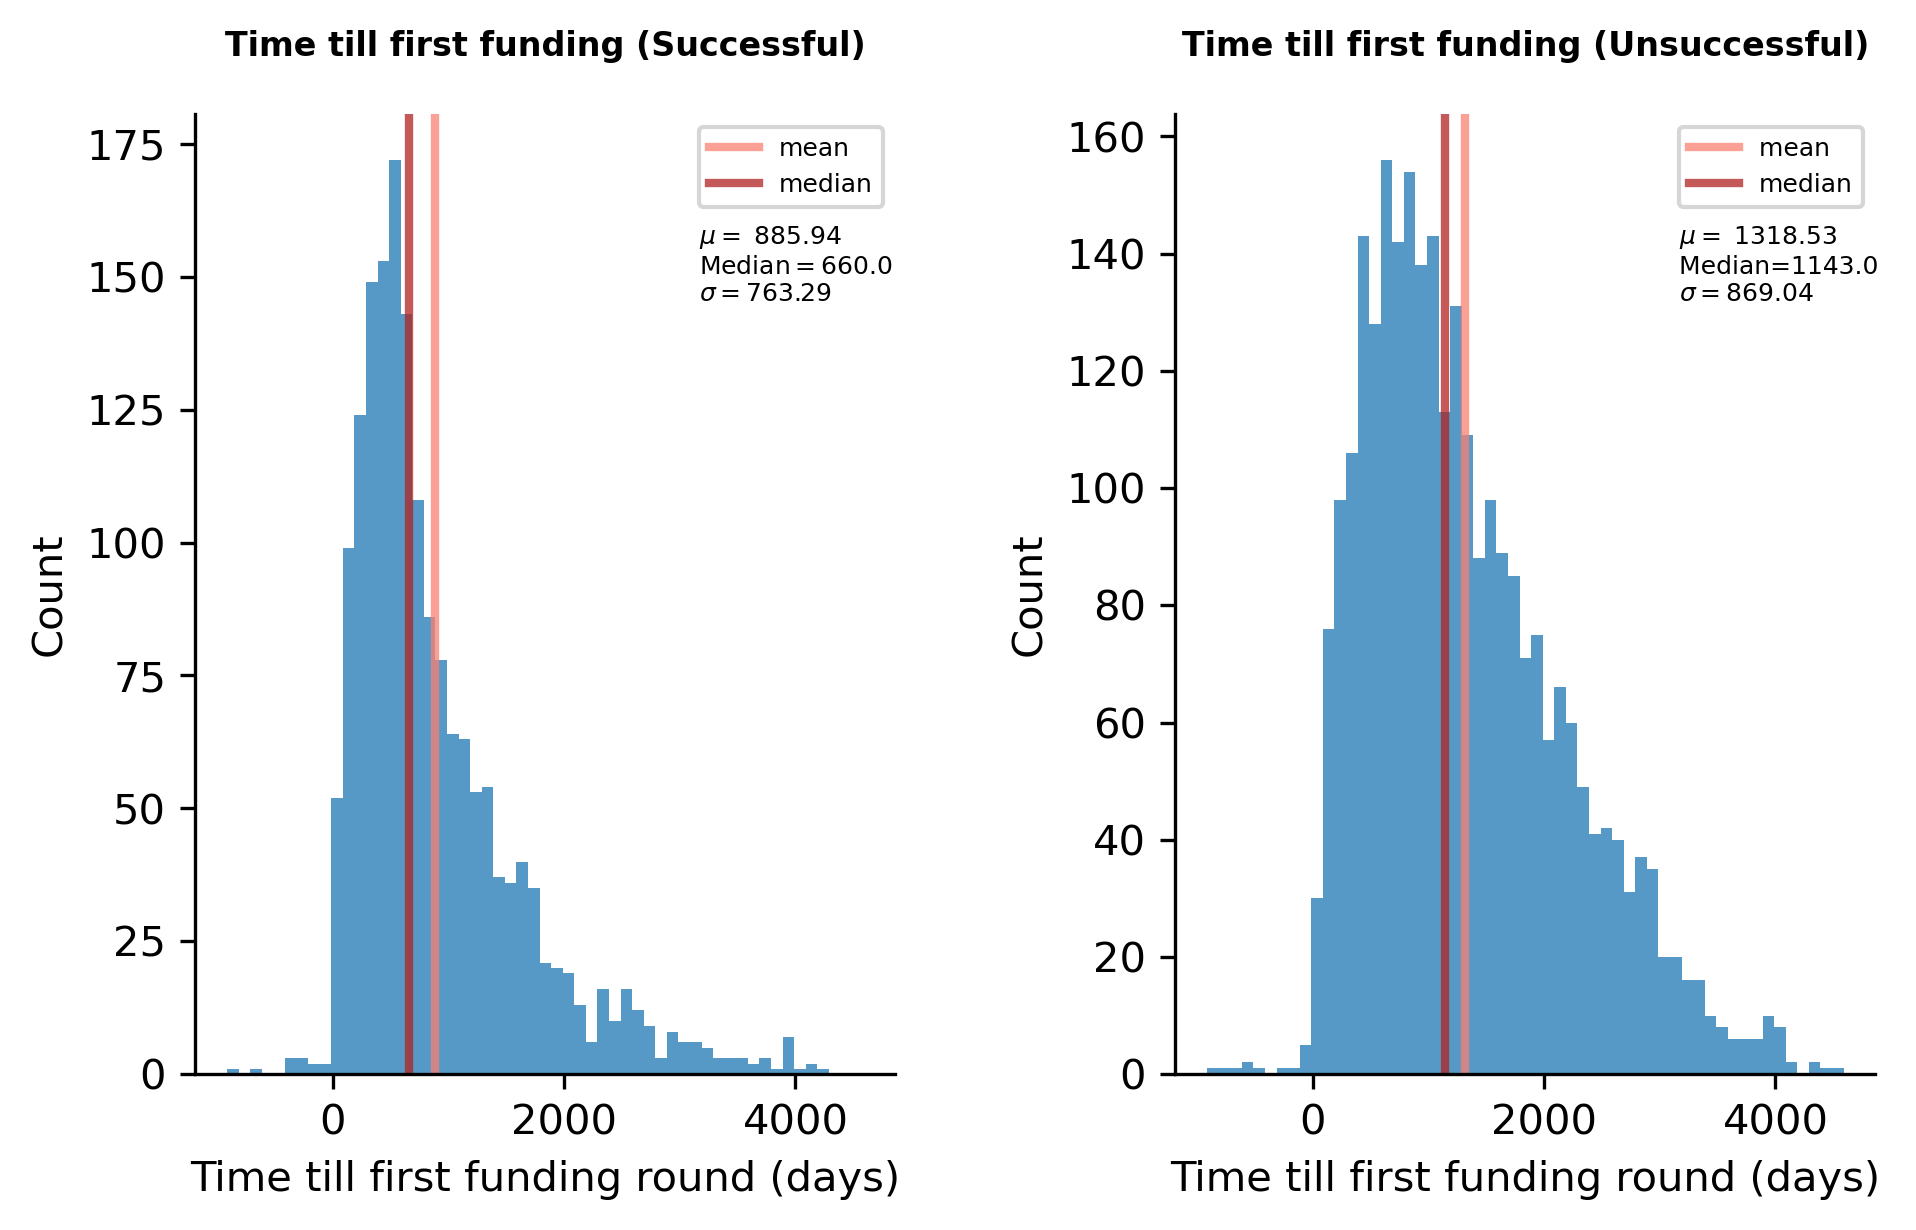

In [250]:
# Define figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300, facecolor='w')

for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        ax.hist(df_company_success['time_first_funding'].dt.days.to_numpy(), 
                bins=np.arange(df_company_fail['time_first_funding'].dt.days.min(), df_company_fail['time_first_funding'].dt.days.max(), 100), 
                alpha=0.75)

        # add mean and median
        mean        = np.round(np.nanmean(df_company_success['time_first_funding'].dt.days.to_numpy()),2)
        median      = np.round(np.nanmedian(df_company_success['time_first_funding'].dt.days.to_numpy()),2)
        sd          = np.round(np.nanstd(df_company_success['time_first_funding'].dt.days.to_numpy()),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=$ %s\nMedian$=$%s \n$\sigma=$%s' % (mean,median,sd), 
                    xy=(.72, .8), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till first funding round (days)")
        ax.set_ylabel("Count")
        ax.set_title('Time till first funding (Successful)', fontweight='bold', fontsize=8, pad=14)

    else:

        ax.hist(df_company_fail['time_first_funding'].dt.days.to_numpy(), 
                bins=np.arange(df_company_fail['time_first_funding'].dt.days.min(), df_company_fail['time_first_funding'].dt.days.max(), 100), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(df_company_fail['time_first_funding'].dt.days.to_numpy()),2)
        median      = np.round(np.nanmedian(df_company_fail['time_first_funding'].dt.days.to_numpy()),2)
        sd          = np.round(np.nanstd(df_company_fail['time_first_funding'].dt.days.to_numpy()), 2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean ')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)
        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=$ %s\nMedian=%s \n$\sigma=%s$' % (mean,median,sd), 
                    xy=(.72, .8), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till first funding round (days)")
        ax.set_ylabel("Count")
        ax.set_title( 'Time till first funding (Unsuccessful)', fontweight='bold', fontsize=8, pad=14)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

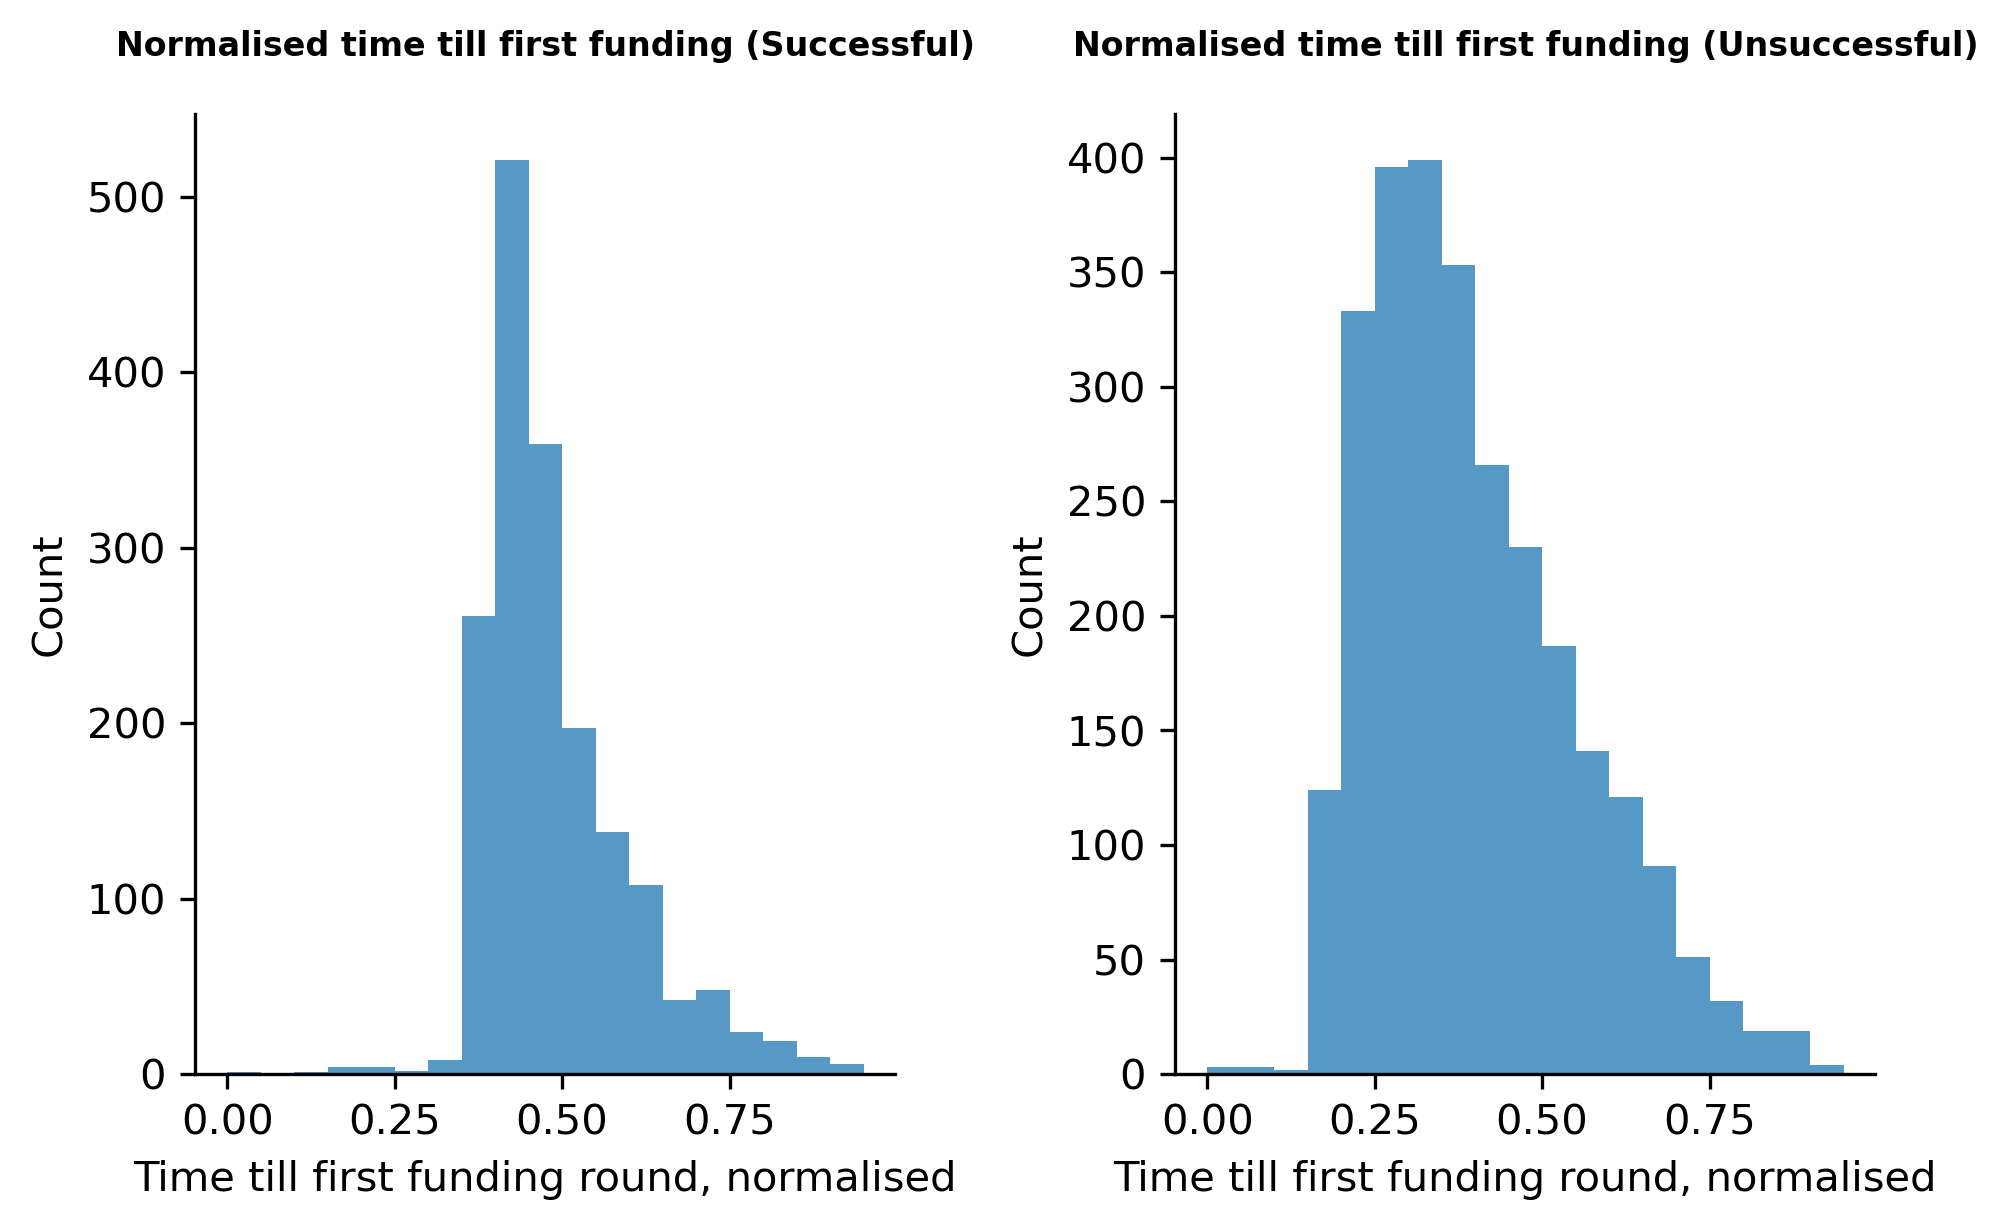

In [251]:
# Define figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300, facecolor='w')

for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        ax.hist(df_company_success['time_first_funding_normalised'], 
                bins=np.arange(df_company_success['time_first_funding_normalised'].min(), df_company_success['time_first_funding_normalised'].max(), 0.05), 
                alpha=0.75)

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till first funding round, normalised")
        ax.set_ylabel("Count")
        ax.set_title('Normalised time till first funding (Successful)', fontweight='bold', fontsize=8, pad=14)

    else:

        ax.hist(df_company_fail['time_first_funding_normalised'], 
                bins=np.arange(df_company_fail['time_first_funding_normalised'].min(), df_company_fail['time_first_funding_normalised'].max(), 0.05), 
                alpha=0.75)

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till first funding round, normalised")
        ax.set_ylabel("Count")
        ax.set_title( 'Normalised time till first funding (Unsuccessful)', fontweight='bold', fontsize=8, pad=14)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

Interesting, it seems that the unusccessful rounds have a longer tail in the skewed distribution of time till first funding optained, lets check if we can reject the null hypothesis that the two distributions are the same

In [252]:
stats.ttest_ind(df_company_fail['time_first_funding'].dt.days.to_numpy(), 
                df_company_success['time_first_funding'].dt.days.to_numpy(),
                nan_policy = 'omit'
               )

Ttest_indResult(statistic=17.120298428937094, pvalue=1.0108364326190707e-63)

Find the distributions are highly unlikey to be sampled from the identical underlying distribution. We will now look at the total funding obtained in seed round.

In [253]:
# we loop over all the uuids in our success column and get the earliest funding
# we add this information to a new column in our pandas dataframe called 'earliest_funding'
for i, row in df_company_success.iterrows():
    funding = df_rounds_success.loc[(df_rounds_success['org_uuid'] == row['org_uuid']) & 
                                    (df_rounds_success['investment_type'] == 'seed')
                                   ]['raised_amount_usd'].sum()
    df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], 'seed_funding'] = funding

# do the same for unsuccessful companies
for i, row in df_company_fail.iterrows():
    funding = df_rounds_fail.loc[(df_rounds_fail['org_uuid'] == row['org_uuid']) & 
                                    (df_rounds_fail['investment_type'] == 'seed')
                                   ]['raised_amount_usd'].sum()
    df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], 'seed_funding'] = funding
    
df_company_success.head()

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,earliest_funding,time_first_funding,time_first_funding_normalised,seed_funding
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,2016-01-01,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,2017-09-21,629 days,0.453158,0.0
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,10xgenomics.com,ipo,2012-01-01,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,2018-04-27,2308 days,0.704430,4700000.0
2,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",corporate.111.com.cn,ipo,2010-01-01,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea...",2018-09-14,3178 days,0.834630,0.0
3,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,ucenter.17zuoye.com,ipo,2011-01-01,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...,2015-02-20,1511 days,0.585154,0.0
4,8e5b2628-6d2b-4f0a-9808-07c935156515,1inch,1inch.io,operating,2020-07-09,"Blockchain,Cryptocurrency,Information Services...","Financial Services,Information Technology,Othe...",KNA,Old Road Town,1inch Limited builds decentralized protocols a...,2020-08-13,35 days,0.364262,2800000.0


We have to bring these values in some format we can plot, lets put the data on a log scale.

In [254]:
df_company_success['seed_funding_log'] = np.log10(df_company_success['seed_funding'].clip(lower=1))
df_company_fail['seed_funding_log'] = np.log10(df_company_fail['seed_funding'].clip(lower=1))

Lets plot the total funding received in all seed rounds

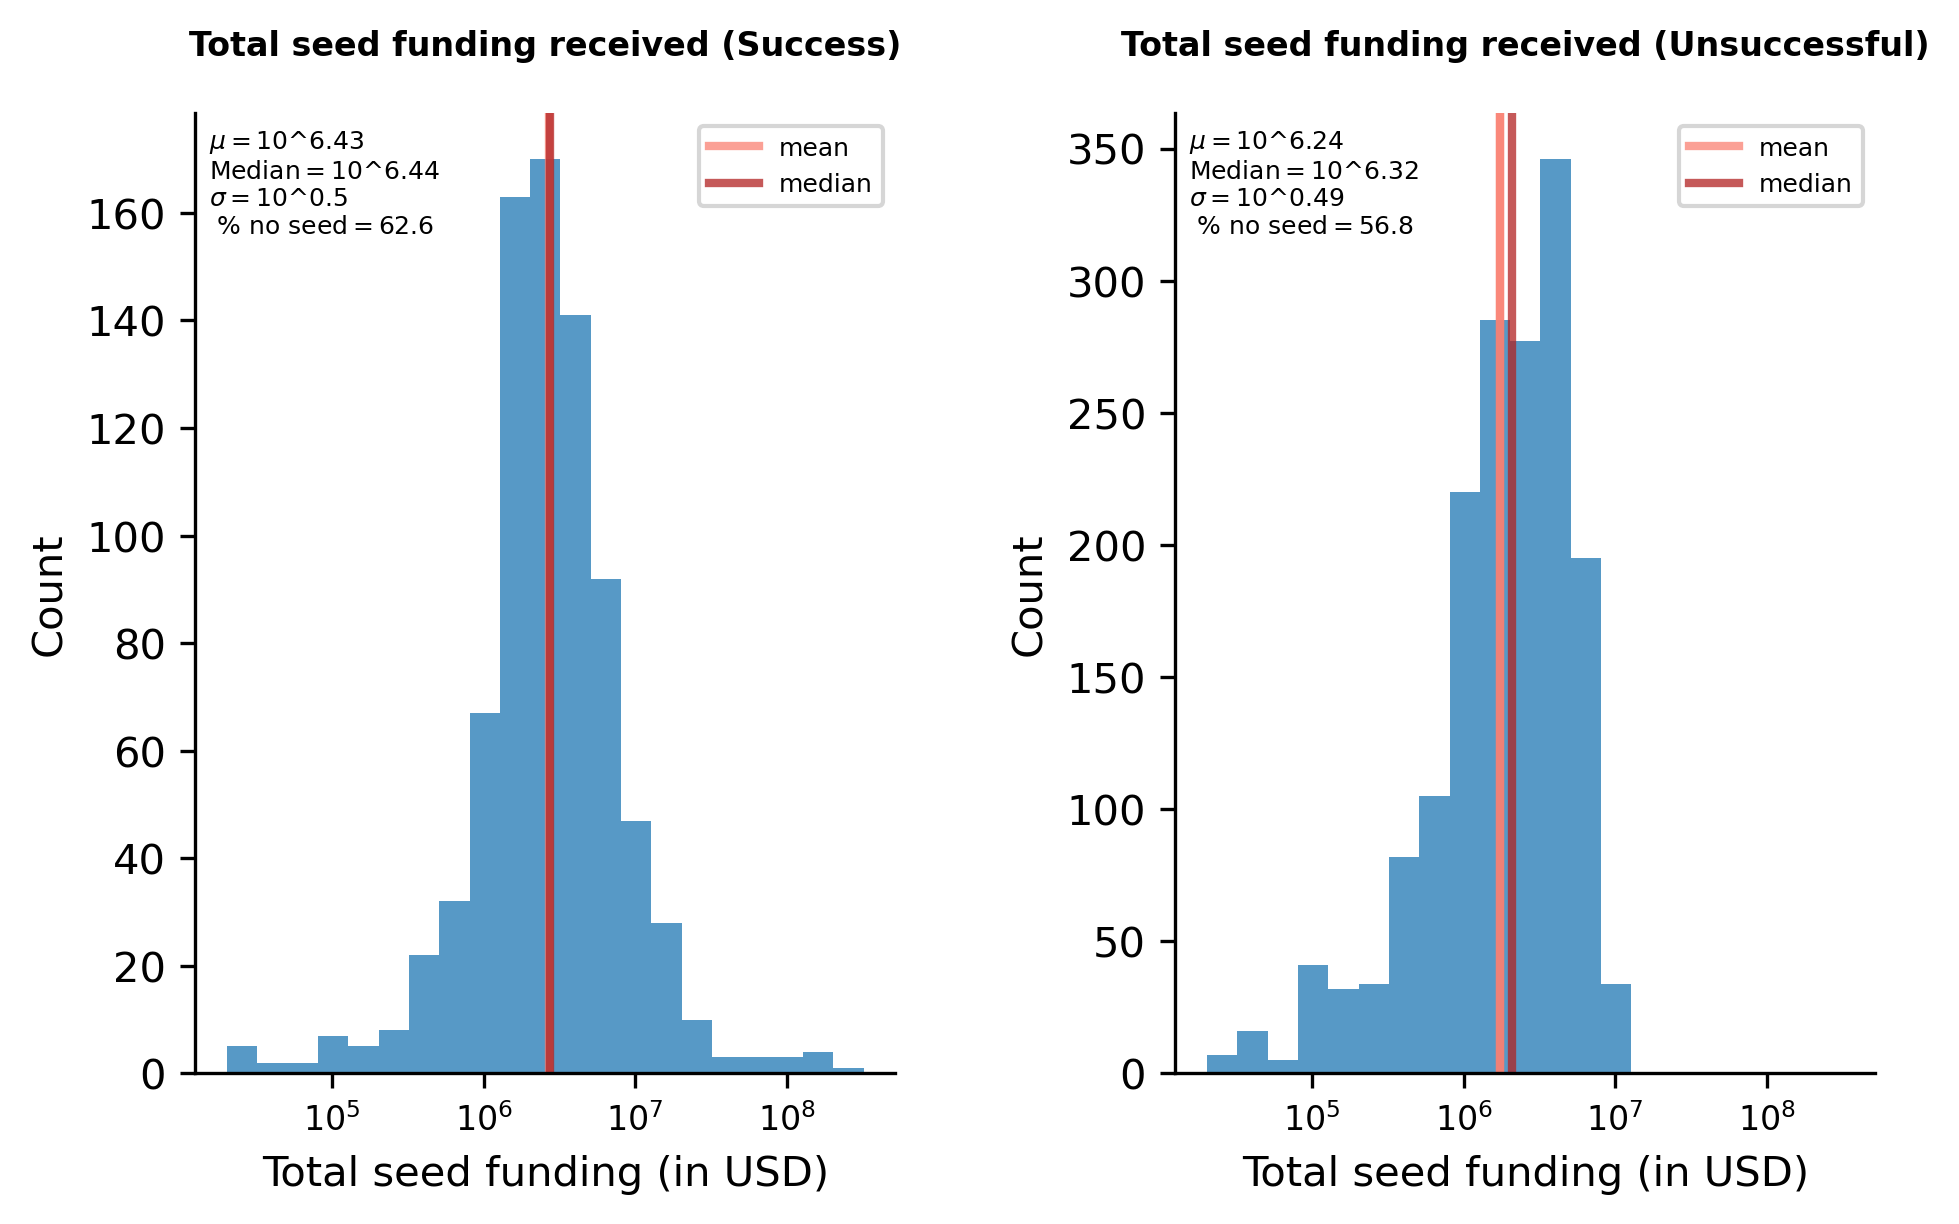

In [255]:
# Define figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300, facecolor='w')

success_data = df_company_success[(df_company_success['seed_funding_log'] !=0)]['seed_funding_log']
fail_data    = df_company_fail[(df_company_fail['seed_funding_log'] !=0)] ['seed_funding_log']

prop_no_seed_success = (df_company_success['seed_funding']==0).sum()/df_company_success['seed_funding'].size
prop_no_seed_fail    = (df_company_fail['seed_funding']==0).sum()/df_company_fail['seed_funding'].size


for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        ax.hist(success_data, 
                bins=np.arange(success_data.min(), success_data.max(), 0.2), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(success_data),2)
        median      = np.round(np.nanmedian(success_data),2)
        sd          = np.round(np.nanstd(success_data),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=10$^{} \nMedian$=10$^{} \n$\sigma=$10^{} \n % no seed$=${}'.format(mean,median,sd, np.round(prop_no_seed_success, 3)*100), 
                    xy=(.02, .87), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')
        
        # make the x ticks
        ax.tick_params(axis='x', which='both', labelsize=8)
        ax.set_xticks(np.arange(5,9,1))
        ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$'])

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Total seed funding (in USD)")
        ax.set_ylabel("Count")
        ax.set_title('Total seed funding received (Success)', fontweight='bold', fontsize=8, pad=14)

    else:

        ax.hist(fail_data, 
                bins=np.arange(success_data.min(), success_data.max(), 0.2), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(fail_data),2)
        median      = np.round(np.nanmedian(fail_data),2)
        sd          = np.round(np.nanstd(fail_data),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=10$^{} \nMedian$=10$^{} \n$\sigma=$10^{} \n % no seed$=${}'.format(mean,median,sd, np.round(prop_no_seed_fail, 3)*100), 
                    xy=(.02, .87), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # make the x ticks
        ax.tick_params(axis='x', which='both', labelsize=8)
        ax.set_xticks(np.arange(5,9,1))
        ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$'])

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Total seed funding (in USD)")
        ax.set_ylabel("Count")
        ax.set_title('Total seed funding received (Unsuccessful)', fontweight='bold', fontsize=8, pad=14)

        # add mean
        ax.axvline(np.nanmean(fail_data.to_numpy()), color ='salmon', lw = 2, alpha = 0.75)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

These distributions look surprisingly, similar.

In [256]:
# finally we also make a min-max normalised version of the data
df_company_success['seed_funding_normalised'] = min_max_scaler.fit_transform(df_company_success['seed_funding'].to_numpy().reshape(-1, 1))
df_company_fail['seed_funding_normalised'] = min_max_scaler.fit_transform(df_company_fail['seed_funding'].to_numpy().reshape(-1, 1))

Now we move on to get the timing from founding date to series a

In [258]:
# we loop over all the uuids in our success column and get the series_a funding date
# we add this information to a new column in our pandas dataframe called 'series_a_funding_date'
for i, row in df_company_success.iterrows():
    df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], 'series_a_funding_date'] = df_rounds_success.loc[(df_rounds_success['org_uuid'] == row['org_uuid']) & 
                                                                                                                               (df_rounds_success['investment_type'] == 'series_a')]['round_created_at'].min()
    
# do the same for unsuccessful companies
for i, row in df_company_fail.iterrows():
    df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], 'series_a_funding_date'] = df_rounds_fail.loc[(df_rounds_fail['org_uuid'] == row['org_uuid']) & 
                                                                                                                               (df_rounds_fail['investment_type'] == 'series_a')]['round_created_at'].min()
                                                                                                                          

In [259]:
# sanity check:
df_rounds_success['investment_type'].value_counts(), df_company_success['series_a_funding_date'].count()

(series_a    2678
 seed        1652
 pre_seed     181
 angel        141
 Name: investment_type, dtype: int64,
 1645)

Now we substract the columns to get the timing from founding to series_a

In [260]:
df_company_success['time_till_series_a'] = df_company_success['series_a_funding_date'] - df_company_success['founded_on']
df_company_fail['time_till_series_a'] = df_company_fail['series_a_funding_date'] - df_company_fail['founded_on']

# we will also add a normalised column
min_max_scaler = preprocessing.MinMaxScaler()
df_company_success['time_till_series_a_normalised'] = min_max_scaler.fit_transform(df_company_success['time_till_series_a'].dt.days.to_numpy().reshape(-1, 1))
df_company_fail['time_till_series_a_normalised'] = min_max_scaler.fit_transform(df_company_fail['time_till_series_a'].dt.days.to_numpy().reshape(-1, 1))

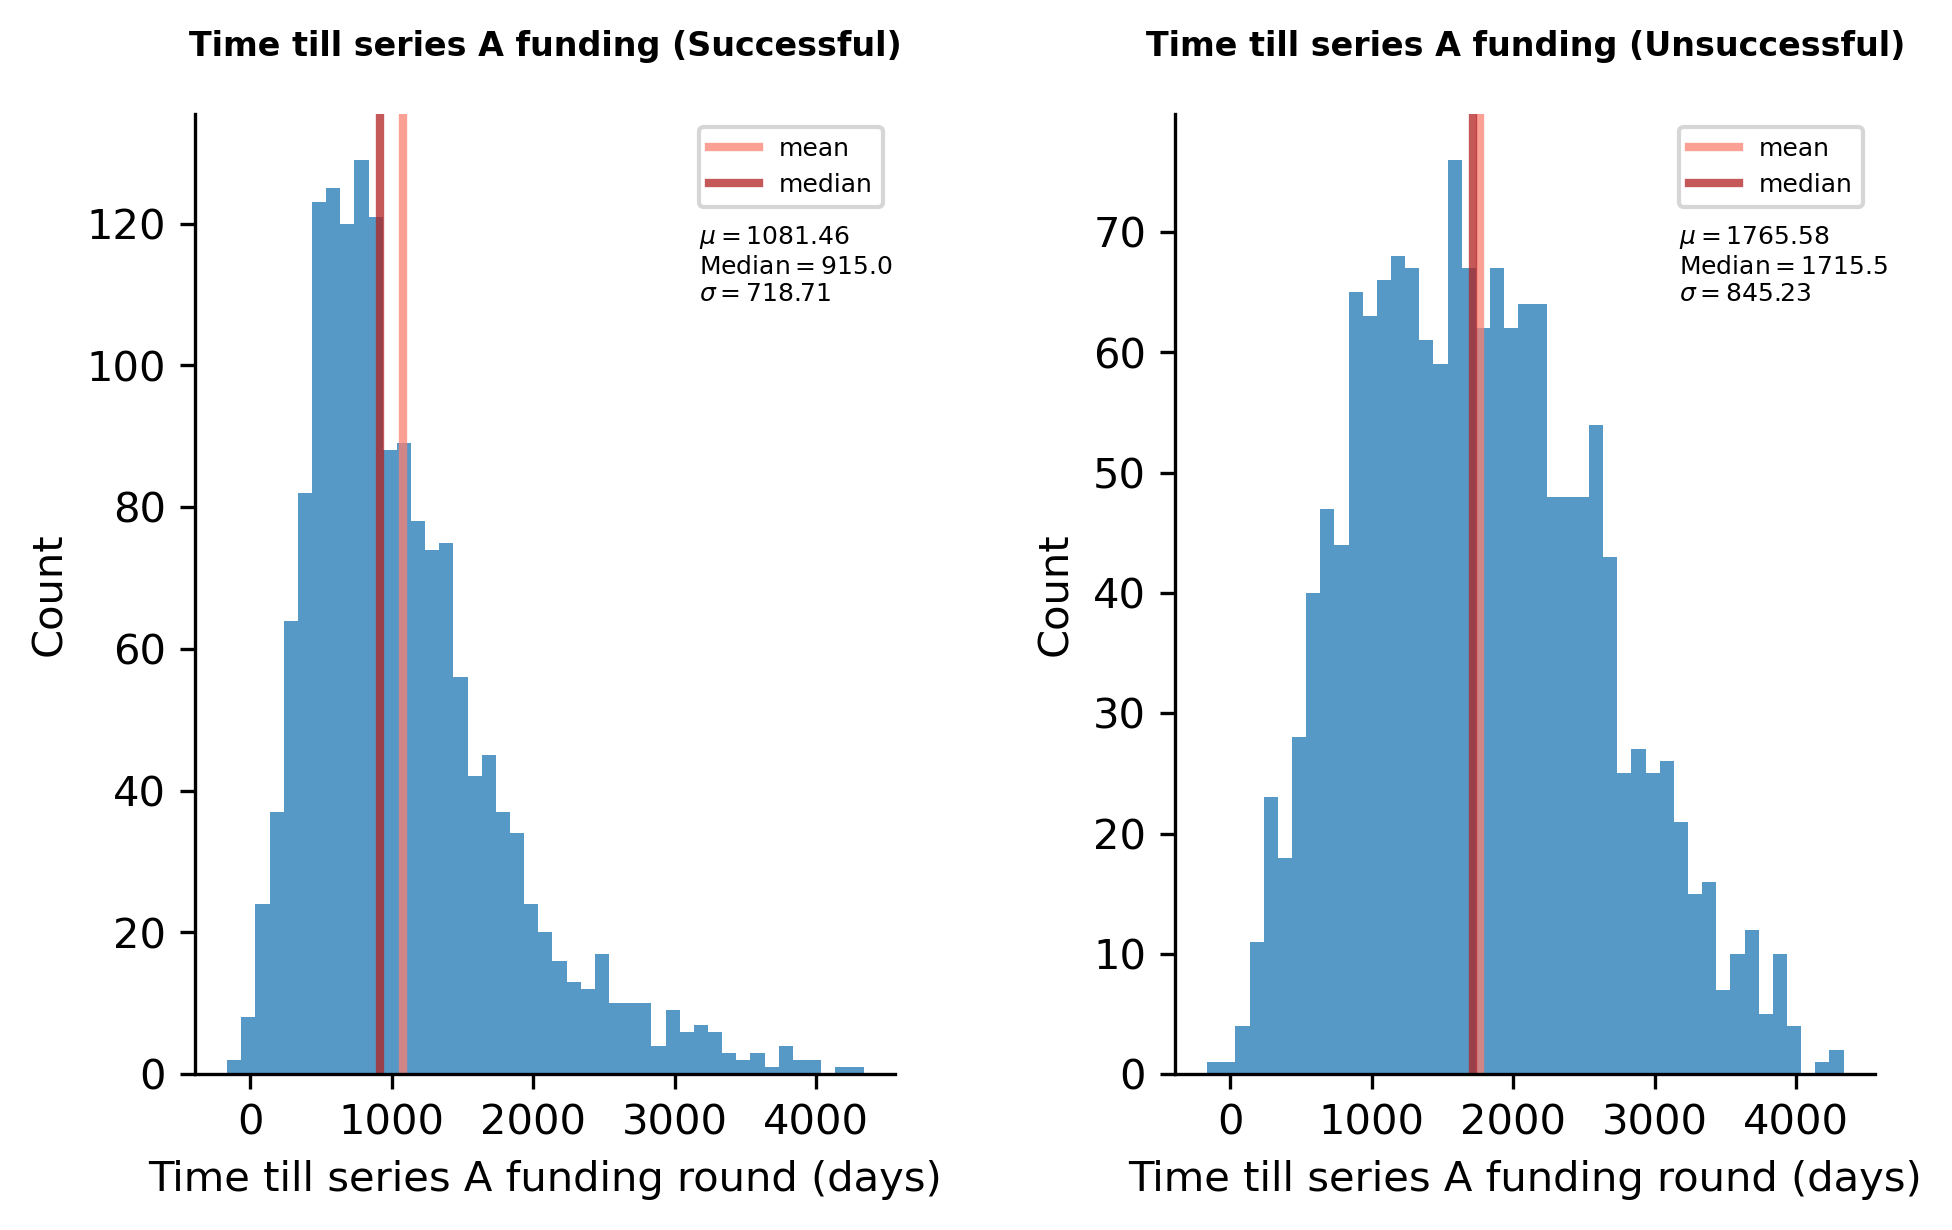

In [261]:
# Define figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300, facecolor='w')

success_data_seriesa = df_company_success['time_till_series_a'].dt.days
fail_data_seriesa = df_company_fail['time_till_series_a'].dt.days

for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        ax.hist(success_data_seriesa.to_numpy(), 
                bins=np.arange(fail_data_seriesa.min(), fail_data_seriesa.max(), 100),
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(success_data_seriesa.to_numpy()),2)
        median      = np.round(np.nanmedian(success_data_seriesa.to_numpy()),2)
        sd          = np.round(np.nanstd(success_data_seriesa.to_numpy()),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=${} \nMedian$=${} \n$\sigma=${}'.format(mean,median,sd), 
                    xy=(.72, .8), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till series A funding round (days)")
        ax.set_ylabel("Count")
        ax.set_title('Time till series A funding (Successful)', fontweight='bold', fontsize=8, pad=14)

    else:

        ax.hist(fail_data_seriesa.to_numpy(), 
                bins=np.arange(fail_data_seriesa.min(), fail_data_seriesa.max(), 100), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(fail_data_seriesa.to_numpy()),2)
        median      = np.round(np.nanmedian(fail_data_seriesa.to_numpy()),2)
        sd          = np.round(np.nanstd(fail_data_seriesa.to_numpy()),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=${} \nMedian$=${} \n$\sigma=${}'.format(mean,median,sd), 
                    xy=(.72, .8), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Time till series A funding round (days)")
        ax.set_ylabel("Count")
        ax.set_title( 'Time till series A funding (Unsuccessful)', fontweight='bold', fontsize=8, pad=14)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

Lets move on to Series A total_funding

In [263]:
# we loop over all the uuids in our success column and get the earliest funding
# we add this information to a new column in our pandas dataframe called 'earliest_funding'
for i, row in df_company_success.iterrows():
    funding = df_rounds_success.loc[(df_rounds_success['org_uuid'] == row['org_uuid']) & 
                                    (df_rounds_success['investment_type'] == 'series_a')
                                   ]['raised_amount_usd'].sum()
    df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], 'series_a_funding'] = funding

# do the same for unsuccessful companies
for i, row in df_company_fail.iterrows():
    funding = df_rounds_fail.loc[(df_rounds_fail['org_uuid'] == row['org_uuid']) & 
                                    (df_rounds_fail['investment_type'] == 'series_a')
                                   ]['raised_amount_usd'].sum()
    df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], 'series_a_funding'] = funding

# also here we will put the values on a log scale
df_company_success['series_a_funding_log'] = np.log10(df_company_success['series_a_funding'].clip(lower=1))
df_company_fail['series_a_funding_log'] = np.log10(df_company_fail['series_a_funding'].clip(lower=1))

# finally we also make a min-max normalised version of the data
df_company_success['series_a_funding_normalised'] = min_max_scaler.fit_transform(df_company_success['series_a_funding'].to_numpy().reshape(-1, 1))
df_company_fail['series_a_funding_normalised'] = min_max_scaler.fit_transform(df_company_fail['series_a_funding'].to_numpy().reshape(-1, 1))
 

(2179, 22)

Lets plot this

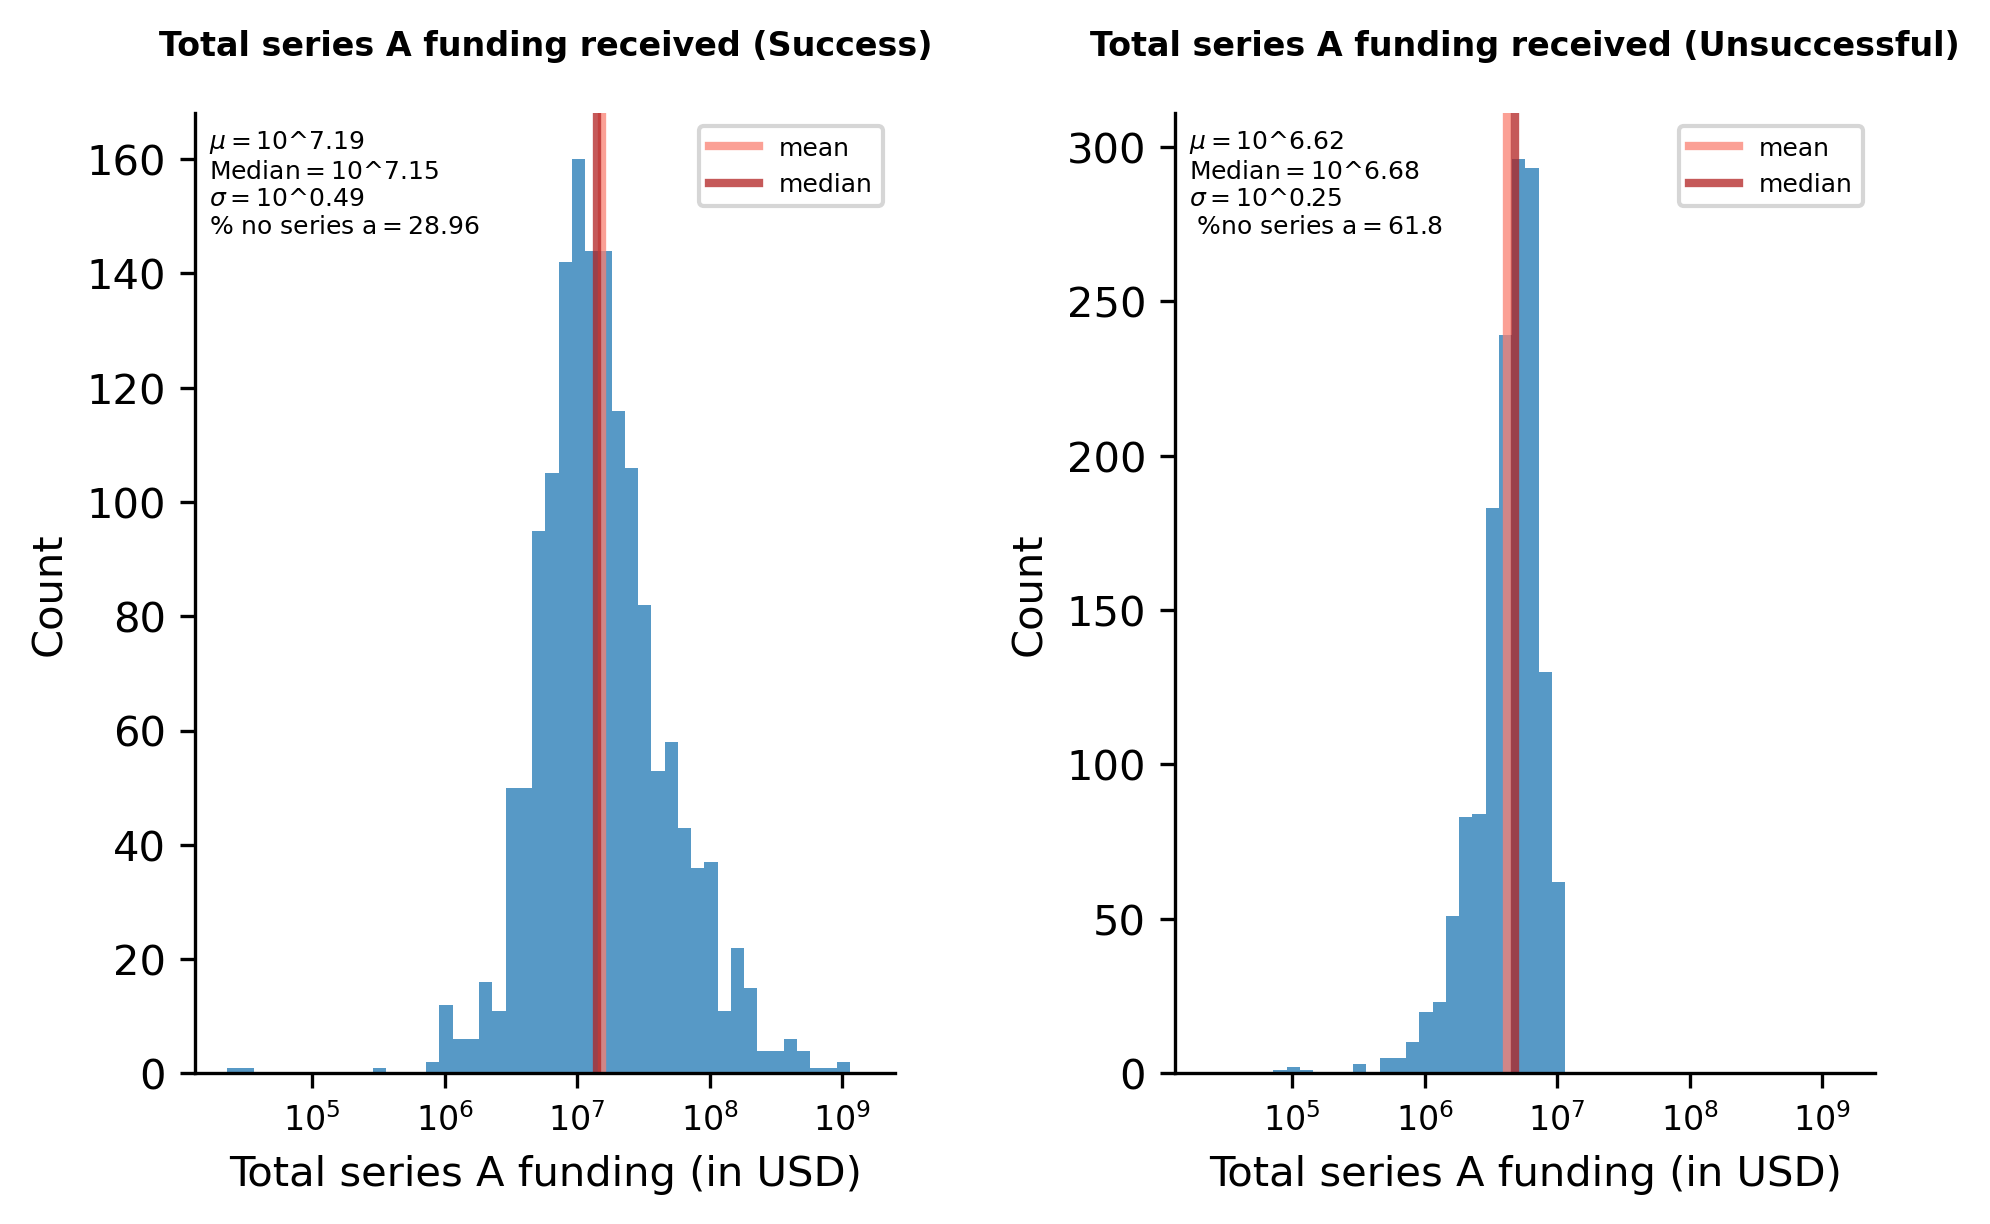

In [264]:
# Define figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300, facecolor='w')

success_data = df_company_success[(df_company_success['series_a_funding_log'] !=0)]['series_a_funding_log']
fail_data    = df_company_fail[(df_company_fail['series_a_funding_log'] !=0)] ['series_a_funding_log']


prop_no_seed_success = (df_company_success['series_a_funding_log']==0).sum()/df_company_success['series_a_funding_log'].size
prop_no_seed_fail    = (df_company_fail['series_a_funding_log']==0).sum()/df_company_fail['series_a_funding_log'].size


for i, ax in enumerate(axes.flatten()):

    if (i % 2) == 0:

        ax.hist(success_data, 
                bins=np.arange(success_data.min(), success_data.max(), 0.1), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(success_data),2)
        median      = np.round(np.nanmedian(success_data),2)
        sd          = np.round(np.nanstd(success_data),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=10$^{} \nMedian$=10$^{} \n$\sigma=$10^{} \n% no series a$=${}'.format(mean,median,sd, np.round(prop_no_seed_success*100, 2)), 
                    xy=(.02, .87), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')
        
        # make the x ticks
        ax.tick_params(axis='x', which='both', labelsize=8)
        ax.set_xticks(np.arange(5,10,1))
        ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'])

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Total series A funding (in USD)")
        ax.set_ylabel("Count")
        ax.set_title('Total series A funding received (Success)', fontweight='bold', fontsize=8, pad=14)

    else:

        ax.hist(fail_data, 
                bins=np.arange(success_data.min(), success_data.max(), 0.1), 
                alpha=0.75)
        
        # add mean and median
        mean        = np.round(np.nanmean(fail_data),2)
        median      = np.round(np.nanmedian(fail_data),2)
        sd          = np.round(np.nanstd(fail_data),2)
        mean_line   = ax.axvline(mean, color ='salmon', lw = 2, alpha = 0.75, label='mean')
        median_line = ax.axvline(median, color ='firebrick', lw = 2, alpha = 0.75, label='median')

        # make legend 
        ax.legend(handles=[mean_line, median_line], fontsize=6)

        # make a second legend with mean, median, and sd
        ax.annotate('$\mu=10$^{} \nMedian$=10$^{} \n$\sigma=$10^{} \n %no series a$=${}'.format(mean,median,sd, np.round(prop_no_seed_fail, 3)*100), 
                    xy=(.02, .87), 
                    xycoords='axes fraction', 
                    fontsize=6,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

        # make the x ticks
        ax.tick_params(axis='x', which='both', labelsize=8)
        ax.set_xticks(np.arange(5,10,1))
        ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'])

        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        # make the labels
        ax.set_xlabel("Total series A funding (in USD)")
        ax.set_ylabel("Count")
        ax.set_title('Total series A funding received (Unsuccessful)', fontweight='bold', fontsize=8, pad=14)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)



WOW!!! The log-scale obscures it but companies with success get on average 3 times more funding in the series a round. Now, we will save the data in a useful way so we can make use of it for our model training. We still have to add the number of fuding rounds to our dataframe.

In [150]:
pd.set_option('display.max_columns', None)
df_company_success.head(1)

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,earliest_funding,time_first_funding,time_first_funding_normalised,seed_funding,seed_funding_log,seed_funding_normalised,series_a_funding_date,time_till_series_a,time_till_series_a_normalised,series_a_funding,series_a_funding_log,series_a_funding_normalised
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,2016-01-01,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,2017-09-21,629 days,0.453158,0.0,0.0,0.0,2017-09-21,629 days,0.340076,45867909.0,7.661509,0.030462


In [269]:
investment_type_list = count_df_success.investment_type.unique().tolist()

# add the n rounds for successful companies
for j, itype in enumerate(investment_type_list):
    for i, row in df_company_success.iterrows():
        
        n_rounds = count_df_success.loc[(count_df_success['org_uuid'] == row['org_uuid']) & 
                                        (count_df_success['investment_type'] == itype)
                                        ]['size']
        if n_rounds.to_numpy().shape[0] == 0:
            df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], itype + '_n_rounds'] = 0
        else:
            df_company_success.loc[df_company_success['org_uuid'] == row['org_uuid'], itype + '_n_rounds'] = n_rounds.to_numpy()[0]

for j, itype in enumerate(investment_type_list):
    for i, row in df_company_fail.iterrows():
        
        n_rounds = count_df_fail.loc[(count_df_fail['org_uuid'] == row['org_uuid']) & 
                                        (count_df_fail['investment_type'] == itype)
                                        ]['size']
        if n_rounds.to_numpy().shape[0] == 0:
            df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], itype + '_n_rounds'] = 0
        else:
            df_company_fail.loc[df_company_fail['org_uuid'] == row['org_uuid'], itype + '_n_rounds'] = n_rounds.to_numpy()[0]

df_company_fail.head(3) 

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,earliest_funding,time_first_funding,time_first_funding_normalised,seed_funding,seed_funding_log,seed_funding_normalised,series_a_funding_date,time_till_series_a,time_till_series_a_normalised,series_a_funding,series_a_funding_log,series_a_funding_normalised,seed_n_rounds,series_a_n_rounds,angel_n_rounds,pre_seed_n_rounds
0,86bd89a7-fe3f-12d4-817c-8157c8592194,i.Sec,isec.ng,operating,2013-01-01,"Finance,FinTech",Financial Services,NGA,Lagos,i.Sec is a financial security service that all...,NaT,NaT,NaN,0.0,0.000000,0.000000,NaT,NaT,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,58fd74f2-9ebb-4a41-cd75-05f9214a9a11,Kukua,kukua.me,operating,2015-01-01,"Content,EdTech,Franchise,Media and Entertainment","Education,Media and Entertainment,Other,Software",KEN,Nairobi,The edutainment company for children of the 21...,2018-11-08,1407 days,0.414477,2500961.0,6.398107,0.250096,2022-06-29,2736 days,0.633406,6000000.0,6.778151,0.600000,3.0,1.0,0.0,0.0
2,e8772824-d8d5-7636-0bd5-40b76511213b,Airdog,airdog.com,operating,2014-01-01,"Artificial Intelligence,Drones,Robotics","Artificial Intelligence,Consumer Electronics,C...",LVA,Riga,We build smart robots that bring unprecedented...,2015-03-19,442 days,0.242002,2499329.0,6.397823,0.249933,2016-07-18,929 days,0.238865,3506665.0,6.544894,0.350666,1.0,1.0,0.0,0.0


we replaces NaN by 0, we first look how much data is missing in the time delta columns as treating NANs as Zeros would be fatal in these cases, quite a bit is missing so lets use the KNNImputer

In [266]:
# summarize the number of rows with missing values for each column
col_date_list = ['time_first_funding_normalised', 'time_till_series_a_normalised']
for col in col_date_list:
 # count number of rows with missing values
 n_miss = df_company_fail[col].isnull().sum()
 perc = n_miss / df_company_fail.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (df_company_fail.shape[0] ,n_miss, perc))

> 3900, Missing: 1123 (28.8%)
> 3900, Missing: 2324 (59.6%)


In [267]:
# summarize the number of rows with missing values for each column

for col in col_date_list:
 # count number of rows with missing values
 n_miss = df_company_success[col].isnull().sum()
 perc = n_miss / df_company_success.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (df_company_success.shape[0], n_miss, perc))

> 2179, Missing: 416 (19.1%)
> 2179, Missing: 534 (24.5%)


In [279]:
col_list = ['time_first_funding_normalised', 
            'time_till_series_a_normalised', 
            'seed_funding_normalised', 
            'series_a_funding_normalised',
            'seed_n_rounds', 
            'series_a_n_rounds',	
            'angel_n_rounds',
            'pre_seed_n_rounds']

X_fail = df_company_fail[col_list]

# define imputer
imputer = KNNImputer(n_neighbors=5)

# fit on the dataset
imputer.fit(X_fail)

# transform the dataset
X_fail_trans = imputer.transform(X_fail)
X_fail_trans.shape

for i, col in enumerate(col_date_list):
    df_company_fail[col] = X_fail_trans[:,i]


In [280]:
col_list = ['time_first_funding_normalised', 
            'time_till_series_a_normalised', 
            'seed_funding_normalised', 
            'series_a_funding_normalised',
            'seed_n_rounds', 
            'series_a_n_rounds',	
            'angel_n_rounds',
            'pre_seed_n_rounds']

X_fail = df_company_success[col_list]

# define imputer
imputer = KNNImputer(n_neighbors=5)

# fit on the dataset
imputer.fit(X_fail)

# transform the dataset
X_fail_trans = imputer.transform(X_fail)
X_fail_trans.shape

for i, col in enumerate(col_date_list):
    df_company_success[col] = X_fail_trans[:,i]

In [281]:
# summarize the number of rows with missing values for each column

for col in col_date_list:
 # count number of rows with missing values
 n_miss = df_company_success[col].isnull().sum()
 perc = n_miss / df_company_success.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (df_company_success.shape[0], n_miss, perc))

> 2179, Missing: 0 (0.0%)
> 2179, Missing: 0 (0.0%)


In [282]:
# summarize the number of rows with missing values for each column
col_date_list = ['time_first_funding_normalised', 'time_till_series_a_normalised']
for col in col_date_list:
 # count number of rows with missing values
 n_miss = df_company_fail[col].isnull().sum()
 perc = n_miss / df_company_fail.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (df_company_fail.shape[0] ,n_miss, perc))

> 3900, Missing: 0 (0.0%)
> 3900, Missing: 0 (0.0%)


The imputation worked! Now save the data and on to modelling

In [286]:
# adding a success flag
df_company_fail['success_flag']  = 0
df_company_success['success_flag']  = 1

df_all_temp_feat = pd.concat([df_company_fail, df_company_success], ignore_index=True, sort=False)

df_all_temp_feat.shape

df_all_temp_feat.to_csv('data/Data_merged_temp_features.csv')